In [ ]:
suppressMessages(library(ggplot2))


In [1]:
help(rt)


In [23]:
length(z)

[1] 100

In [24]:
ld <= (vb0 + z)

[1]  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25]  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
 [37]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
 [49]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [61]  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [73]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [85]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
 [97]  TRUE  TRUE  TRUE  TRUE

[1] -1.882501784 -1.264072973 -0.120358964  2.474622180 -0.474227216
 [6] -0.232368421 -0.531702133 -0.928595704 -0.735773593 -0.612446393
[11] -1.054491656 -0.063279587 -0.399226828  0.741501319  0.132007083
[16]  1.361482289 -0.205521192  1.730060099  0.472934398  0.748497416
[21] -1.584082373  1.385280310 -0.364022568  0.047400561 -0.482278718
[26]  0.355419742  0.270761535 -1.210330743  0.844035869  0.785403358
[31] -0.469135129 -0.923594652  0.057562510  1.312314976  0.473579026
[36]  0.291061157 -0.541348530  0.630081132 -0.383155552 -1.655794674
[41]  0.117278894 -0.559032649  0.299974662  1.647485442  0.274097332
[46] -0.007553472 -0.170669242 -1.045737664 -2.426769411  0.899672686

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
[13] FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[37]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[49]  TRUE  TRUE

[1]  0.0000000  0.2040816  0.4081633  0.6122449  0.8163265  1.0204082
 [7]  1.2244898  1.4285714  1.6326531  1.8367347  2.0408163  2.2448980
[13]  2.4489796  2.6530612  2.8571429  3.0612245  3.2653061  3.4693878
[19]  3.6734694  3.8775510  4.0816327  4.2857143  4.4897959  4.6938776
[25]  4.8979592  5.1020408  5.3061224  5.5102041  5.7142857  5.9183673
[31]  6.1224490  6.3265306  6.5306122  6.7346939  6.9387755  7.1428571
[37]  7.3469388  7.5510204  7.7551020  7.9591837  8.1632653  8.3673469
[43]  8.5714286  8.7755102  8.9795918  9.1836735  9.3877551  9.5918367
[49]  9.7959184 10.0000000

[1] 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1

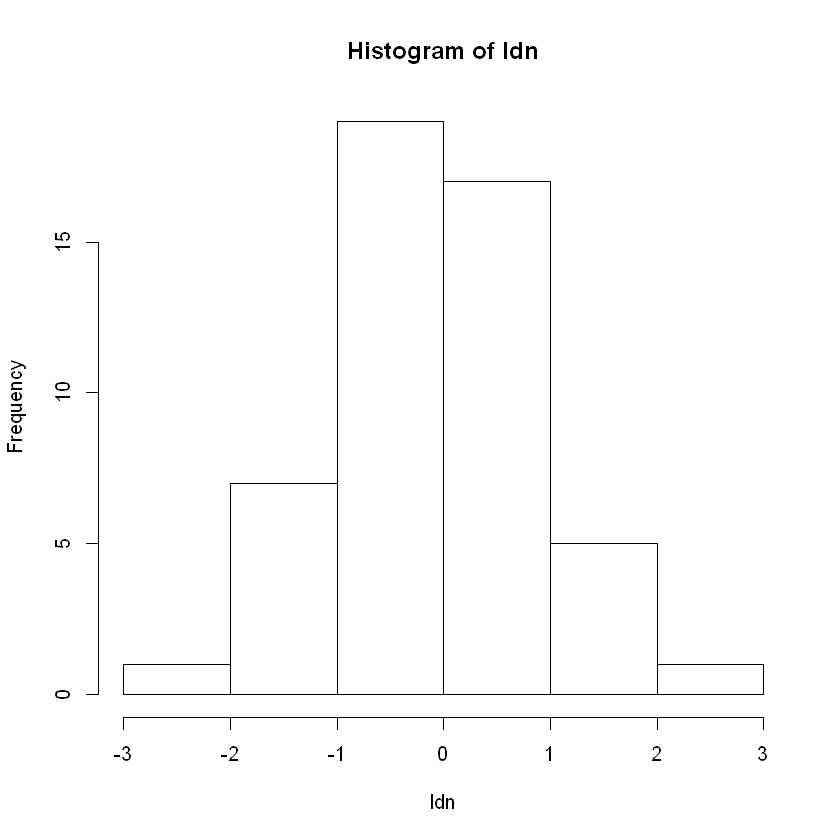

In [139]:
#generación de datos

b0=-3
b1 = 1
nu1 = 1
nu2 = 10
n=50
zn = seq(0,10,by=10/(n-1))
ldn = rt(n,nu2)
ldn
yn = rep(0,n)
vb0 = rep(b0,n)
v1 = rep(1,n)
ldn<=(vb0 + zn)
yn[ldn<=(vb0 + zn)]=1
zn
hist(ldn)
yn

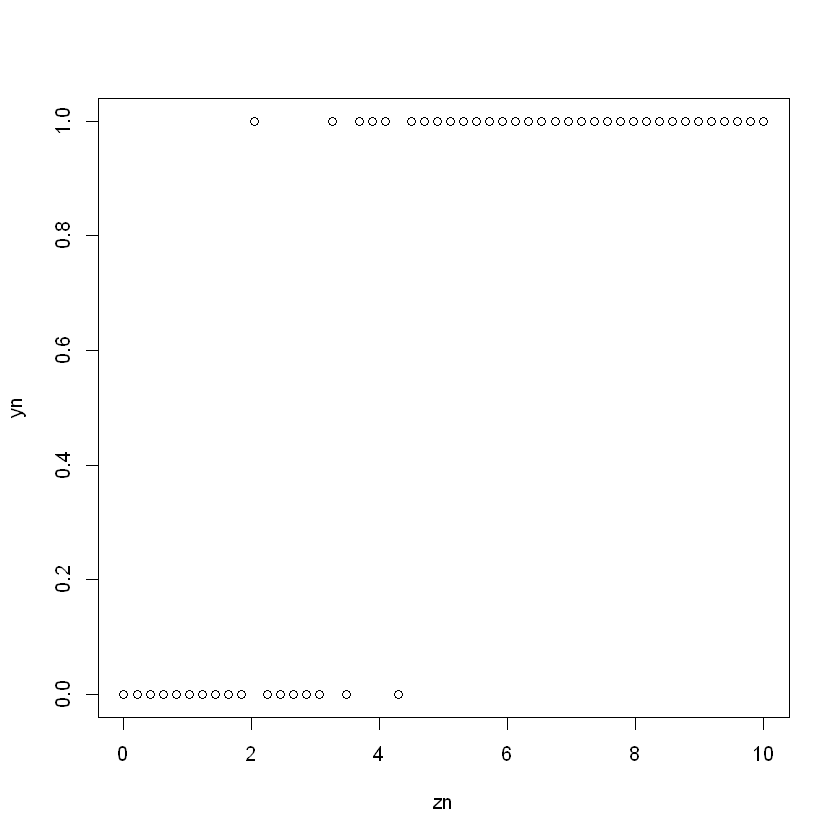

In [140]:
plot(zn,yn)

In [141]:
## cálvulo modelo paramétrico
param_post <- function(yn,zn,n){
    paso= 20/49
    v1 = rep(1,n)
    bgrid <- expand.grid(seq(-10,10,by=paso), seq(-10,10,by=paso))
    mat <- bgrid[,1]%*%t(v1)+bgrid[,2]%*%t(zn)
    phi_mat <- pnorm(mat)
    y_mat <- matrix(yn,ncol=n,nrow=2500,byrow=TRUE)
    phi_vec <- (phi_mat**y_mat)*((1-phi_mat)**(1-y_mat))
    prob_grid <-apply(phi_vec,1,prod)
    prob_grid <- prob_grid/sum(prob_grid)
    posterior = t(phi_mat)%*%prob_grid
    return (posterior)
}

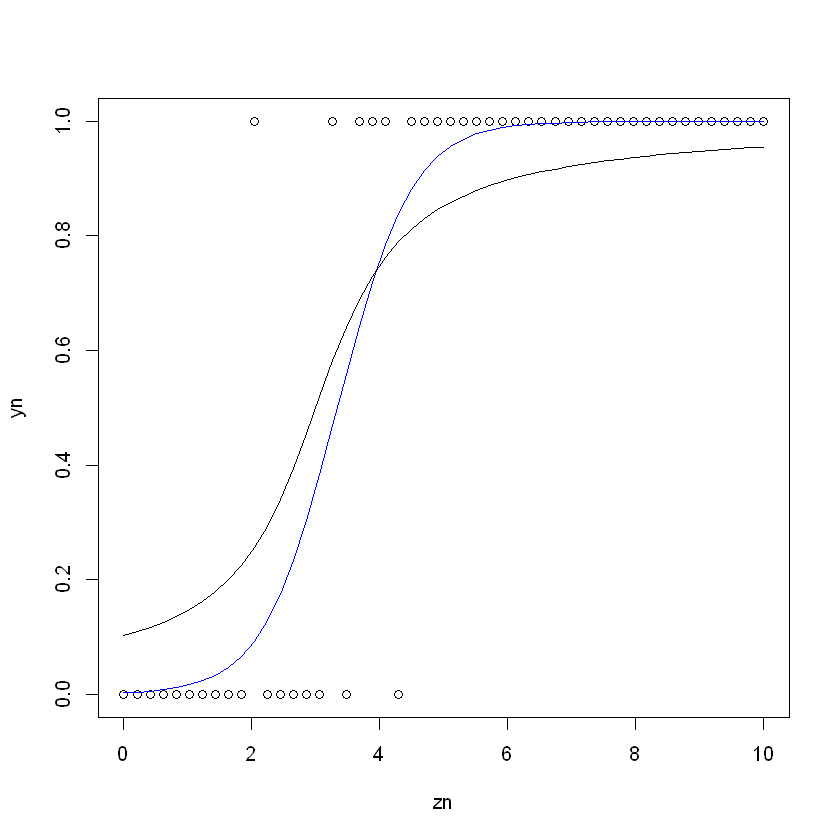

In [142]:
posterior = param_post(yn,zn,n) 
plot(zn,yn)
lines(zn,posterior,col="blue")
prob_real = pt(b0+b1*zn,nu1)
lines(zn, prob_real)